# Titanic Challenge - Kaggle

In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing the Titanic Train dataset
titanic_df = pd.read_csv('train.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# In order to see the info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Basic questions to answer:
# 1. Who were the passengers? (ages,class,gender...)
# 2. What deck the passengers were and how that relates to their class
# 3. Where did the passengers come from?
# 4. Who was alone and who wasn't?
# 5. What factors helped someone survive the sinking?

In [8]:
%matplotlib inline

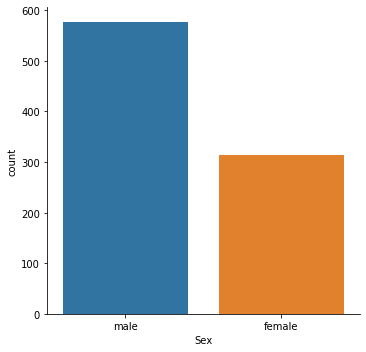

In [9]:
# gender check up to see the passengers on Titanic
sns.catplot('Sex', data=titanic_df, kind='count')

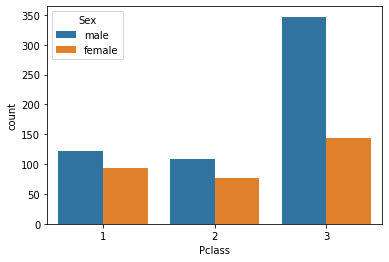

In [10]:
# Separating the gender by classes

sns.countplot('Pclass', data = titanic_df, hue = 'Sex')

In [11]:
# Here we can see that there is way more males in the first class than females.
# What about the children?
# Building a function to visualize male, female, and children

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [12]:
# Now that the function was created, it should be applied.
# I'm creating a new column called 'person' and applying the male_female_child function on it

titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [13]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


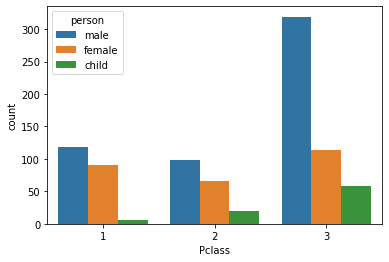

In [14]:
# Now that the column 'person' was created, we can see how many male, female, and children there is in each class

sns.countplot('Pclass', data = titanic_df, hue = 'person')

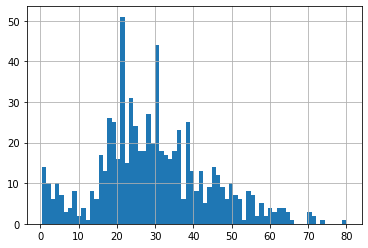

In [15]:
# In order to have a more precise distribution of the passengers' age, we can build a Histogram

titanic_df['Age'].hist(bins = 70)

In [16]:
# The mean age is:

titanic_df['Age'].mean()

29.69911764705882

In [17]:
# Now the total count of male, female, and children

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

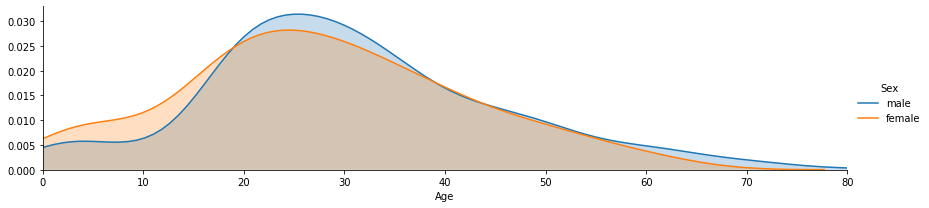

In [51]:
# Another way to visualize that data is by using a facet visualization and to map for kde plots in order to generate multiple plots

fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

# now making the axis' limit equal to the oldest passenger

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

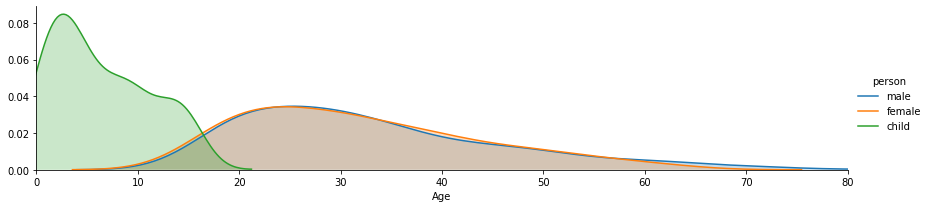

In [19]:
# To visualize the children:

fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

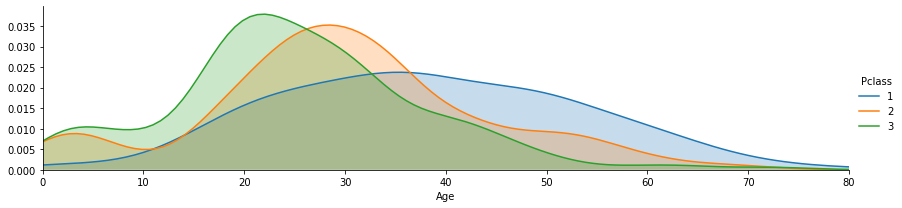

In [20]:
# To see it by class

fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

In [21]:
# Now we can have some idea of who the passengers were.
# It's time to answer the second question
# Taking a look at the dataset again:

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [22]:
# There are a lot of missing values in the Cabin column.
# Now I'm dropping all NAs from the Cabin column

deck = titanic_df['Cabin'].dropna()

In [23]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

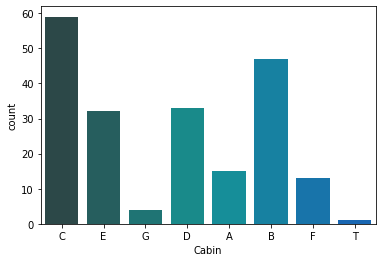

In [24]:
# As we can see, we have the letter for the deck level, and the number for the cabin number.
# We only need the letter to classify the deck, so we are grabbing only the letter 

levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin', data = cabin_df, palette = 'winter_d')

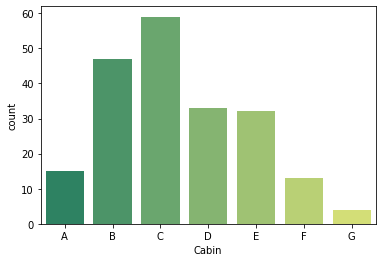

In [25]:
# Getting rid of the T column (it's a value in the end that doesn't make sense)

cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.countplot('Cabin', data = cabin_df, palette = 'summer', order = ['A','B','C','D','E','F','G'])

In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


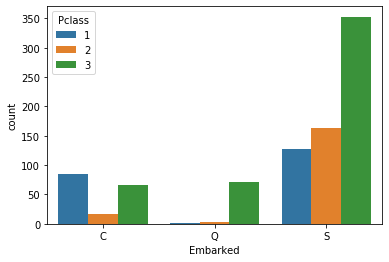

In [27]:
# Where did the passengers come from?

sns.countplot('Embarked', data = titanic_df, hue = 'Pclass', order = ['C','Q','S'])

In [28]:
# We can notice that in Queen's Town, most of the passengers that were born there are third class
# What we may think about it is: what are the economics of the town in that period?
# what are the economics of the 'C' city where we have most first class?

In [29]:
# Who was alone and who was with family?

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [30]:
# Let's define 'alone'

In [31]:
# If 'SibSp' and 'Parch' columns (siblings and parents) are 0, it means they are alone

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [32]:
# If the alone column is greater than zero, it means they have some sort of family onboard


In [33]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


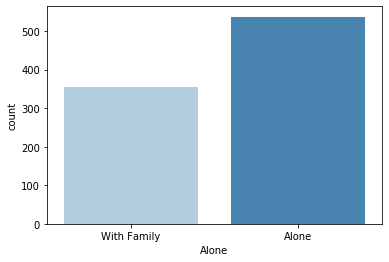

In [35]:
# Visualizing this:

sns.countplot('Alone', data = titanic_df, palette = 'Blues')

In [36]:
# It seems more people were alone than with family


In [37]:
# What factors help people survive the sinking?

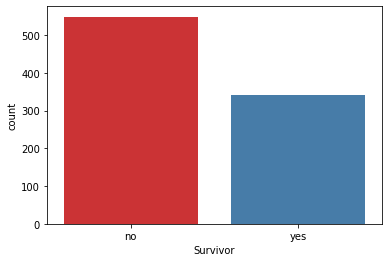

In [38]:
titanic_df['Survivor'] = titanic_df.Survived.map({0: 'no', 1: 'yes'})

sns.countplot('Survivor', data = titanic_df, palette = 'Set1')

In [39]:
# more people did not survive

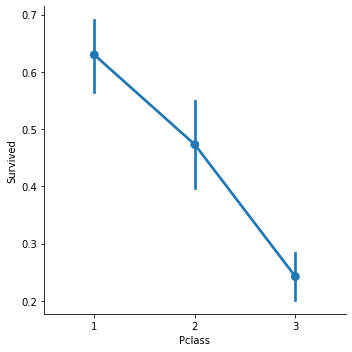

In [40]:
# Let's see if the class was a factor (the movie show that third class passengers did not as well as first and second class ones)

sns.catplot('Pclass', 'Survived', data = titanic_df, kind = 'point')

In [41]:
# Women and children were the first to go, so if the third class was composed mostly by male, as we saw before,
# it makes sense that it was affected more than the other classes

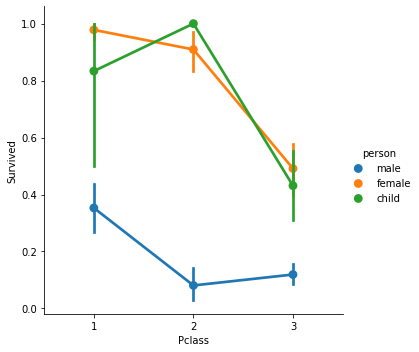

In [42]:
# Now let's see if gender and class together can tell us something

sns.catplot('Pclass', 'Survived', data = titanic_df, kind = 'point', hue = 'person')

In [43]:
# It looks like being male and being on the third class, it's not favorable for survival
# As a matter of fact, being a male, regardless of the class, is not favorable for survival

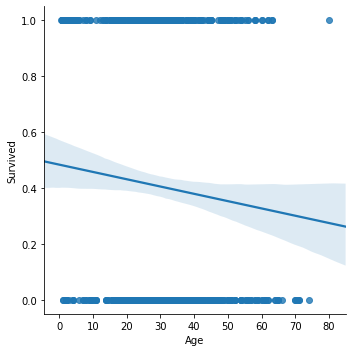

In [44]:
# Is age also a factor?

sns.lmplot('Age', "Survived", titanic_df)

In [45]:
# The trend line shows that the older the passenger, the less likely to survive

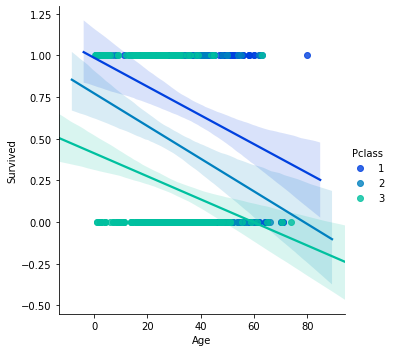

In [46]:
# Let's see the trend among the classes  

sns.lmplot('Age', "Survived", titanic_df, hue = 'Pclass', palette = 'winter')

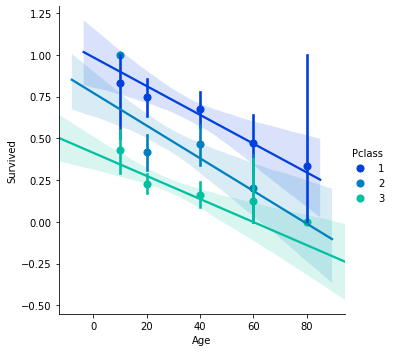

In [47]:
# Getting the figure a little more clean by binnig by age

generations = [10,20,40,60,80]

sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df, palette = 'winter', x_bins = generations)

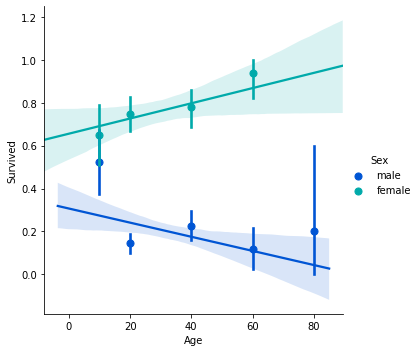

In [48]:
# Let's check how gender and age relate to survival

sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, palette = 'winter', x_bins = generations)

In [49]:
# It's interesting. It looks like if you were an old female you have more chances to survive as if you were an old male
# However, the old male has quite a bit of standard deviation on it, so it would be interesting to have a closer look on that

In [50]:
# 1. Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
# 2. Did having a family member increase the odds of surviving the crash?